Exact DE coefficients [7.0, 11.0, 5.0, -3.0, 5.583853163452858, 9.583853163452858, 3.5838531634528574, -4.416146836547142]
Haar approximation vals [12.72792206  1.41421356 10.725188   -0.5885205 ]
Detailed val coef (Error) [-2.82842712  5.65685425 -2.82842712  5.65685425]
Reconstracted haar signal [ 7.         11.          5.         -3.          5.58385316  9.58385316
  3.58385316 -4.41614684]


<function matplotlib.pyplot.show(close=None, block=None)>

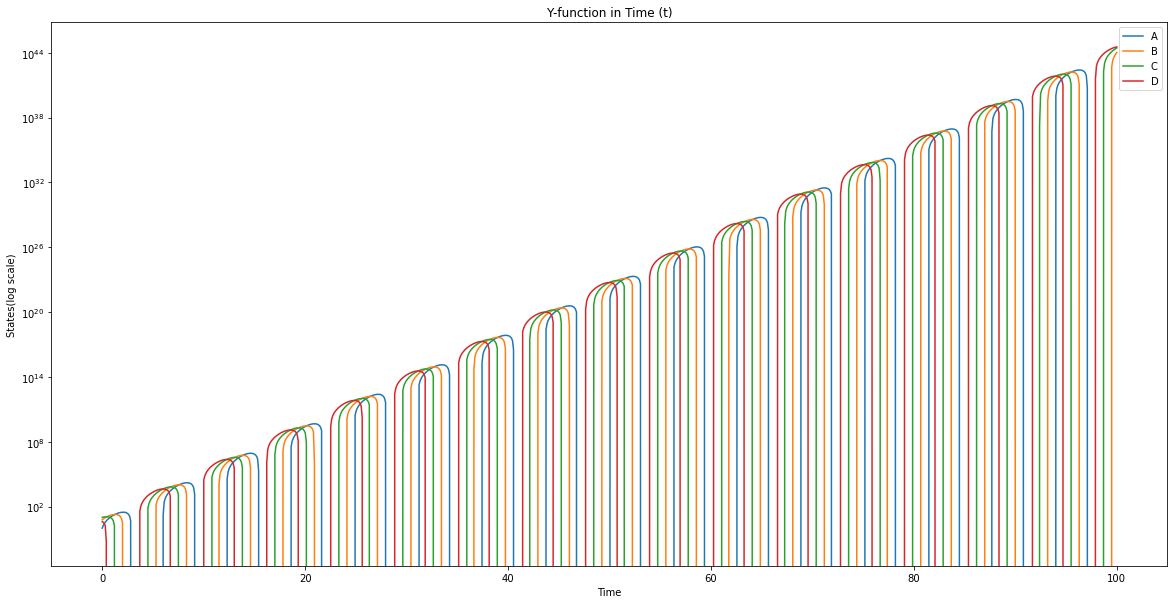

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 16 07:14:44 2021

@author: sojore
"""
import pywt
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

#for simplicity we gonna convert the 4th order ode into a system of coupled differential equation by converting
#it into  a matrix form consisting of 4 variables--check the worksheet for details
#we then  let x1 = A, x2 = B, x3 = C ,x4 = D
#we add a component of the cosine (2t) function which is defined in the range (0,1) to every coupled_differential equation
#taking the cosine values for both t=0 and t=1 (boundary conditions) we then calculate the derivertives for each
#coupled_ode a teach interval 


def ode_solver(x,t):
    
    # setting the boundary conditions for time T0 at (t=0) and time T1 at (t=1)
    T0=0  #---boundary condition at time(t=0)
    T1=1  #---boundary condition at time(t=1)
    N=20  #---setting the number of iterations for each deriverive e.g dAdt
    
    #for a given time (t=0) and (t=1) we can redefine the cosine value (cos 2t) as follows
    cos2t0=math.cos(2*T0) 
    cos2t1=math.cos(2*T1)
    
    
    #assigning vector element to our ode function
    A=x[0]   
    B=x[1]   
    C=x[2]   
    D=x[3] 
    

    t = np.linspace(0, T0, T1) 
    dAdt0=np.empty(N)             #--initializing the derivertives for components A,B,C,D
    dBdt0=np.empty(N)
    dCdt0=np.empty(N)
    dDdt0=np.empty(N)
    dAdt1=np.empty(N)         
    dBdt1=np.empty(N)
    dCdt1=np.empty(N)
    dDdt1=np.empty(N)
    
    #defining the system of coupled_ode
    #we add an element of the cosine function cos(2t) to each of our derivertive equations as shown below
    dAdt0=B +cos2t0
    dBdt0=C +cos2t0
    dCdt0=D +cos2t0
    dDdt0=-4*A +cos2t0
    
    dAdt1=B +cos2t1
    dBdt1=C +cos2t1
    dCdt1=D +cos2t1
    dDdt1=-4*A +cos2t1
    
    
    return [dAdt0,dBdt0,dCdt0,dDdt0,dAdt1,dBdt1,dCdt1,dDdt1]
    
#initializing any initial conditions t0 test thefunction

x0=[1,6,10,4,30,90,1,2] #you can set any initial values of your preference

X=(ode_solver(x0,4)) #this line of code gives the coeffients of the ODE which we need to transform using HAAR Transform

t = np.linspace(0, 100, 1000) 
x=odeint(ode_solver,x0,t)


#unpacking the results of the odeint equation
A=x[:,0]    #storing the outputs of the ODEINT results in the following defined vector components
B=x[:,1]
C=x[:,2]
D=x[:,3]
A1=x[:,4]
B1=x[:,5]
C1=x[:,6]
D1=x[:,7]


   
# wavelet transform analysis of our ODE equation using haar wavelet transform
x=[]
for i in X:
    x.append(i)
    
print(f'Exact DE coefficients {x}')

#using the HAAR WAVELET TRANSFORM to plot the graphs

cA,cD=pywt.dwt(x,'haar') #this is the wavelet transform

# for the inverse wavelet transform we have
y=pywt.idwt(cA,cD,'haar')

# cA --this gives the approximation haar values
# cD --this  gives the detailed value coeficients (error function)
# y ---this gives the reconstracted haar signal
# x----this is the actual coefficients of the ODE function in question
print(f'Haar approximation vals {cA}')  
print(f'Detailed val coef (Error) {cD}')
print(f'Reconstracted haar signal {y}')

# NOTE UNCOMMENT EACH AT A TIME FOR INDEPENDENT GRAPHS PLOT

#plotting the wavelet transform signal for the 

# plt.plot(cA,color='blue',label='Haar Approximation')
# plt.plot(x,color='red',label='Exact ODE coefficients')
# plt.xlabel('Time')
# plt.ylabel('Exact(x) value')
# plt.title('Exact (x) vs Haar Approximation (cA)')
# plt.legend()

# plt.plot(cD,color='blue',label='Error')
# plt.plot(y,color='red',label='reconstracted signal')
# plt.xlabel('Time')
# plt.ylabel('Haars Error')
# plt.title('Haars Error (cD) vs reconstracted signal ')
# plt.legend()

# you can plot the function for the 1st,2nd,3rd and 4th order derivertives soln.

plt.semilogy(t,A,label='A')
plt.semilogy(t,B,label='B')
plt.semilogy(t,C,label='C')
plt.semilogy(t,D,label='D')
plt.ylabel('States(log scale)')
plt.title('Y-function in Time (t)')
plt.xlabel('Time')
plt.legend()
plt.show

